# **ASSIGNMENT 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [3]:
plate_length = 50
t_iter = 500

alpha = 2
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)


t = np.empty((t_iter, plate_length, plate_length))

t_initial = 0

t_top = 100.0
t_left = 0.0
t_bottom = 0.0
t_right = 0.0
# t_right=50.0

t.fill(t_initial)

t[:, (plate_length-1):, :] = t_top
t[:, :, :1] = t_left
t[:, :1, 1:] = t_bottom
t[:, :, (plate_length-1):] = t_right


In [4]:
def calculate(t):
    for k in range(0, t_iter-1, 1):
        for i in range(1, plate_length-1, delta_x):
            for j in range(1, plate_length-1, delta_x):
                t[k + 1, i, j] = gamma * (t[k][i+1][j] +t[k][i-1][j] + t[k][i][j+1] + t[k][i][j-1] - 4*t[k][i][j]) + t[k][i][j]

    return t

In [5]:
def plotheatmap(t_k, k):
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.pcolormesh(t_k, cmap=plt.cm.jet, vmin=0, vmax=100)
    plt.colorbar()

    return plt


In [6]:
t = calculate(t)
def animate(k):
    plotheatmap(t[k], k)

MovieWriter ffmpeg unavailable; using Pillow instead.


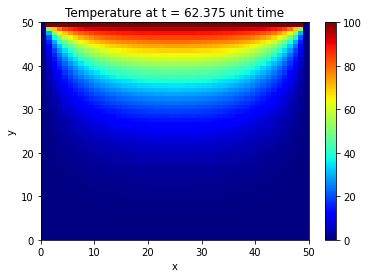

In [7]:
anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=t_iter, repeat=False)
anim.save("heat_equation.gif")